In [4]:
include("../code/slim_graphs.jl")
include("../code/bp_full.jl")
include("../code/plotters/plot_graph.jl")

In [5]:
H = sparse(Bool.([1 0 0 1 0; 0 1 1 1 0 ; 1 1 0 0 1]))

3×5 SparseMatrixCSC{Bool, Int64} with 8 stored entries:
 1  ⋅  ⋅  1  ⋅
 ⋅  1  1  1  ⋅
 1  1  ⋅  ⋅  1

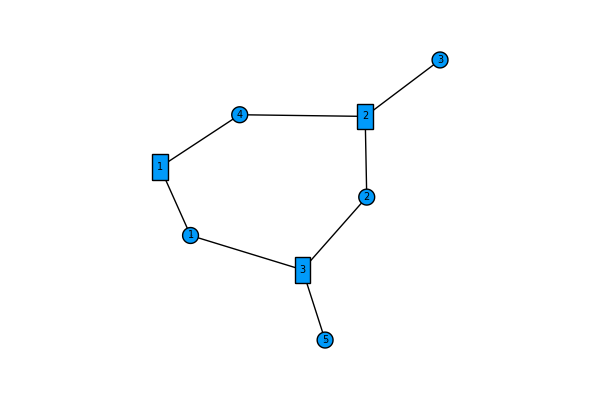

┌ Warning: Indices Base.OneTo(8) of attribute `markershape` does not match data indices 1:422.
└ @ Plots /home/crotti/.julia/packages/Plots/SVksJ/src/utils.jl:102
┌ Info: Data contains NaNs or missing values, and indices of `markershape` vector do not match data indices.
│ If you intend elements of `markershape` to apply to individual NaN-separated segements in the data,
│ pass each segment in a separate vector instead, and use a row vector for `markershape`. Legend entries 
│ may be suppressed by passing an empty label.
│ For example,
│     plot([1:2,1:3], [[4,5],[3,4,5]], label=["y" ""], markershape=[1 2])
└ @ Plots /home/crotti/.julia/packages/Plots/SVksJ/src/utils.jl:104


In [10]:
plot(H)

In [11]:
B,indep = findbasis(H)
Array(B)

5×2 Matrix{Bool}:
 0  1
 1  0
 1  1
 0  1
 1  1

In [12]:
C = [vec(sum(B[:,collect(c)], dims=2) .% 2) for c in Iterators.product(fill([true,false], size(B,2))...)]

2×2 Matrix{Vector{Int64}}:
 [1, 1, 0, 1, 0]  [0, 1, 1, 0, 1]
 [1, 0, 1, 1, 1]  [0, 0, 0, 0, 0]

In [13]:
y = [0,0,1,1,1]
hd(x,y) = sum(x.!=y)
for c in C
    println("Codeword: ", c, ", distortion: ", hd(c,y))
end

Codeword: [1, 1, 0, 1, 0], distortion: 4
Codeword: [1, 0, 1, 1, 1], distortion: 1
Codeword: [0, 1, 1, 0, 1], distortion: 2
Codeword: [0, 0, 0, 0, 0], distortion: 3


In [21]:
s = (-1) .^ y
efield = [(ss,-ss) for ss in s]
ms = BPFull(H, efield);

In [22]:
function cb(it, err, ms)
    x = argmax.(ms.belief) .== 2
    println("Iter ", it, ". Decision variables: ", x, " ε = ", err)
    false
end

iteration_ms!(ms, callback=cb)

Iter 1. Decision variables: Bool[0, 0, 1, 1, 1] ε = 2.0
Iter 2. Decision variables: Bool[1, 0, 1, 1, 0] ε = 2.0
Iter 3. Decision variables: Bool[1, 0, 1, 1, 1] ε = 2.0
Iter 4. Decision variables: Bool[1, 0, 1, 1, 1] ε = 2.0
Iter 5. Decision variables: Bool[1, 0, 1, 1, 1] ε = 2.0
Iter 6. Decision variables: Bool[1, 0, 1, 1, 1] ε = 2.0
Iter 7. Decision variables: Bool[1, 0, 1, 1, 1] ε = 0.0


(0.0, 7)

In [23]:
map(t->t[1]-t[2], ms.u)

8-element Vector{Int64}:
 -4
 -2
  2
  2
 -2
  0
 -2
 -2

In [24]:
map(t->t[1]-t[2], ms.h)

8-element Vector{Int64}:
  0
 -2
  4
  4
 -2
 -4
 -2
 -2